In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
DF_PATH = "../data/processed/1_preprocessed_df.pkl"
EXPORT_PATH = '../data/processed/1_preprocessed_df.pkl'

Read data

In [3]:
df = pd.read_pickle(DF_PATH)

In [4]:
df

id  age  education  sex  is_smoking  cigsPerDay    BPMeds  \
0        0   64        2.0    1           1         3.0  0.000000   
1        1   36        4.0    0           0         0.0  0.000000   
2        2   46        1.0    1           1        10.0  0.000000   
3        3   50        1.0    0           1        20.0  0.000000   
4        4   64        1.0    1           1        30.0  0.000000   
...    ...  ...        ...  ...         ...         ...       ...   
3385  3385   60        1.0    1           0         0.0  0.000000   
3386  3386   46        1.0    1           0         0.0  0.000000   
3387  3387   44        3.0    0           1         3.0  0.000000   
3388  3388   60        1.0    0           0         0.0  0.029886   
3389  3389   54        3.0    1           0         0.0  0.000000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  \
0                   0             0         0    221.0  148.0   85.0   
1                   0             1         0    212.0  168.0   98.0   
2                   0             0         0    250.0  116.0   71.0   
3                   0             1         0    233.0  158.0   88.0   
4                   0             0         0    241.0  136.5   85.0   
...               ...           ...       ...      ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0   
3386                0             0         0    199.0  102.0   56.0   
3387                0             1         0    352.0  164.0  119.0   
3388                0             1         0    191.0  167.0  105.0   
3389                0             0         0    288.0  124.0   77.0   

            BMI  heartRate  glucose  TenYearCHD  
0     25.794964       90.0     80.0           1  
1     29.770000       72.0     75.0           0  
2     20.350000       88.0     94.0           0  
3     28.260000       68.0     94.0           1  
4     26.420000       70.0     77.0           0  
...         ...        ...      ...         ...  
3385  29.280000       70.0    103.0           0  
3386  21.960000       80.0     84.0           0  
3387  28.920000       73.0     72.0           1  
3388  23.010000       80.0     85.0           0  
3389  29.880000       79.0     92.0           0  

[3390 rows x 17 columns]

In [5]:
raw_df=df.drop('id',1)

In [6]:
Y=raw_df['TenYearCHD']
X=raw_df.drop('TenYearCHD',1)

In [7]:
Y

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

<AxesSubplot:>

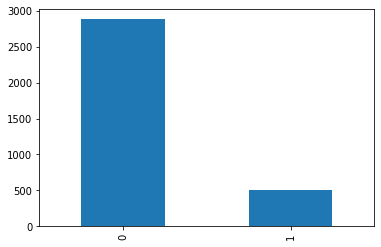

In [8]:
raw_df['TenYearCHD'].value_counts().sort_index().plot.bar()

<AxesSubplot:xlabel='sex', ylabel='count'>

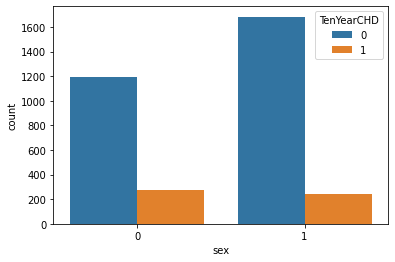

In [9]:
sns.countplot(x ='sex',hue='TenYearCHD', data = raw_df)


<AxesSubplot:xlabel='education', ylabel='count'>

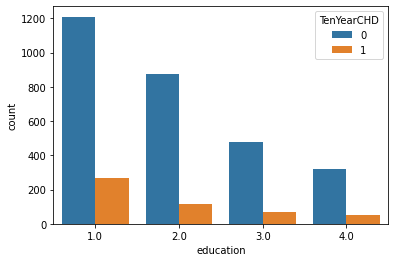

In [10]:
sns.countplot(x ='education',hue='TenYearCHD', data = raw_df)


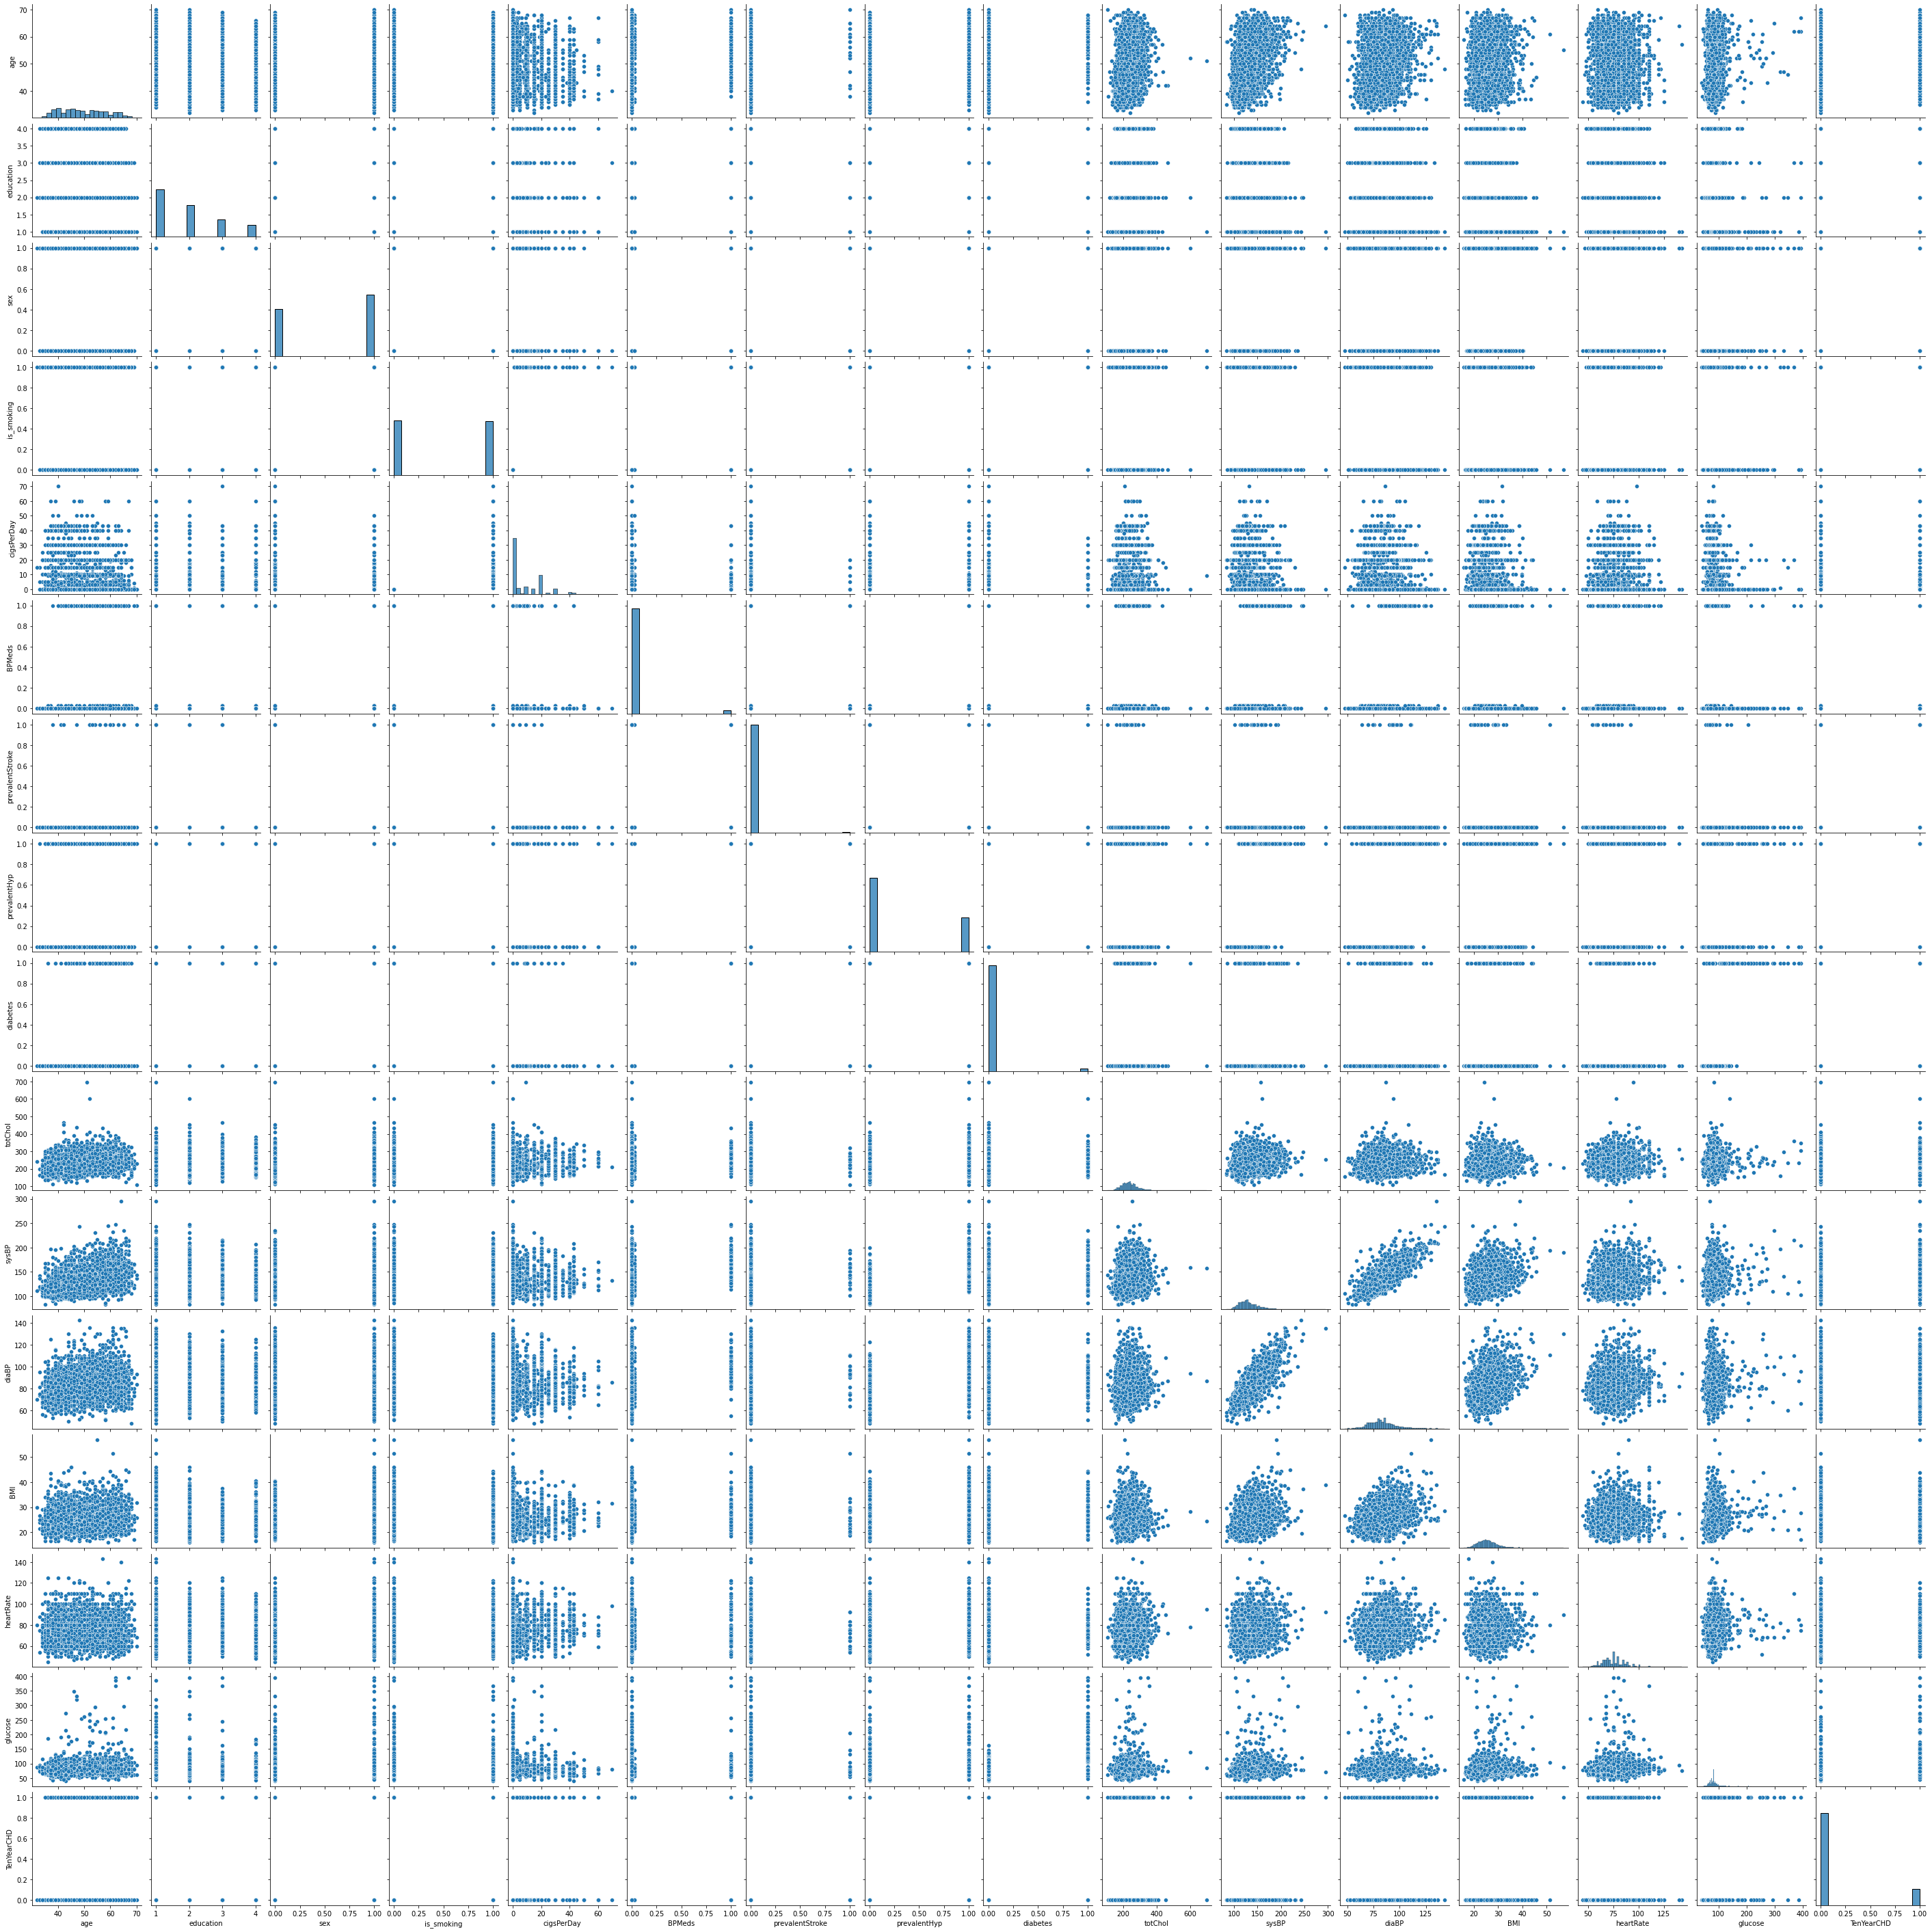

In [11]:
sns.pairplot(raw_df)

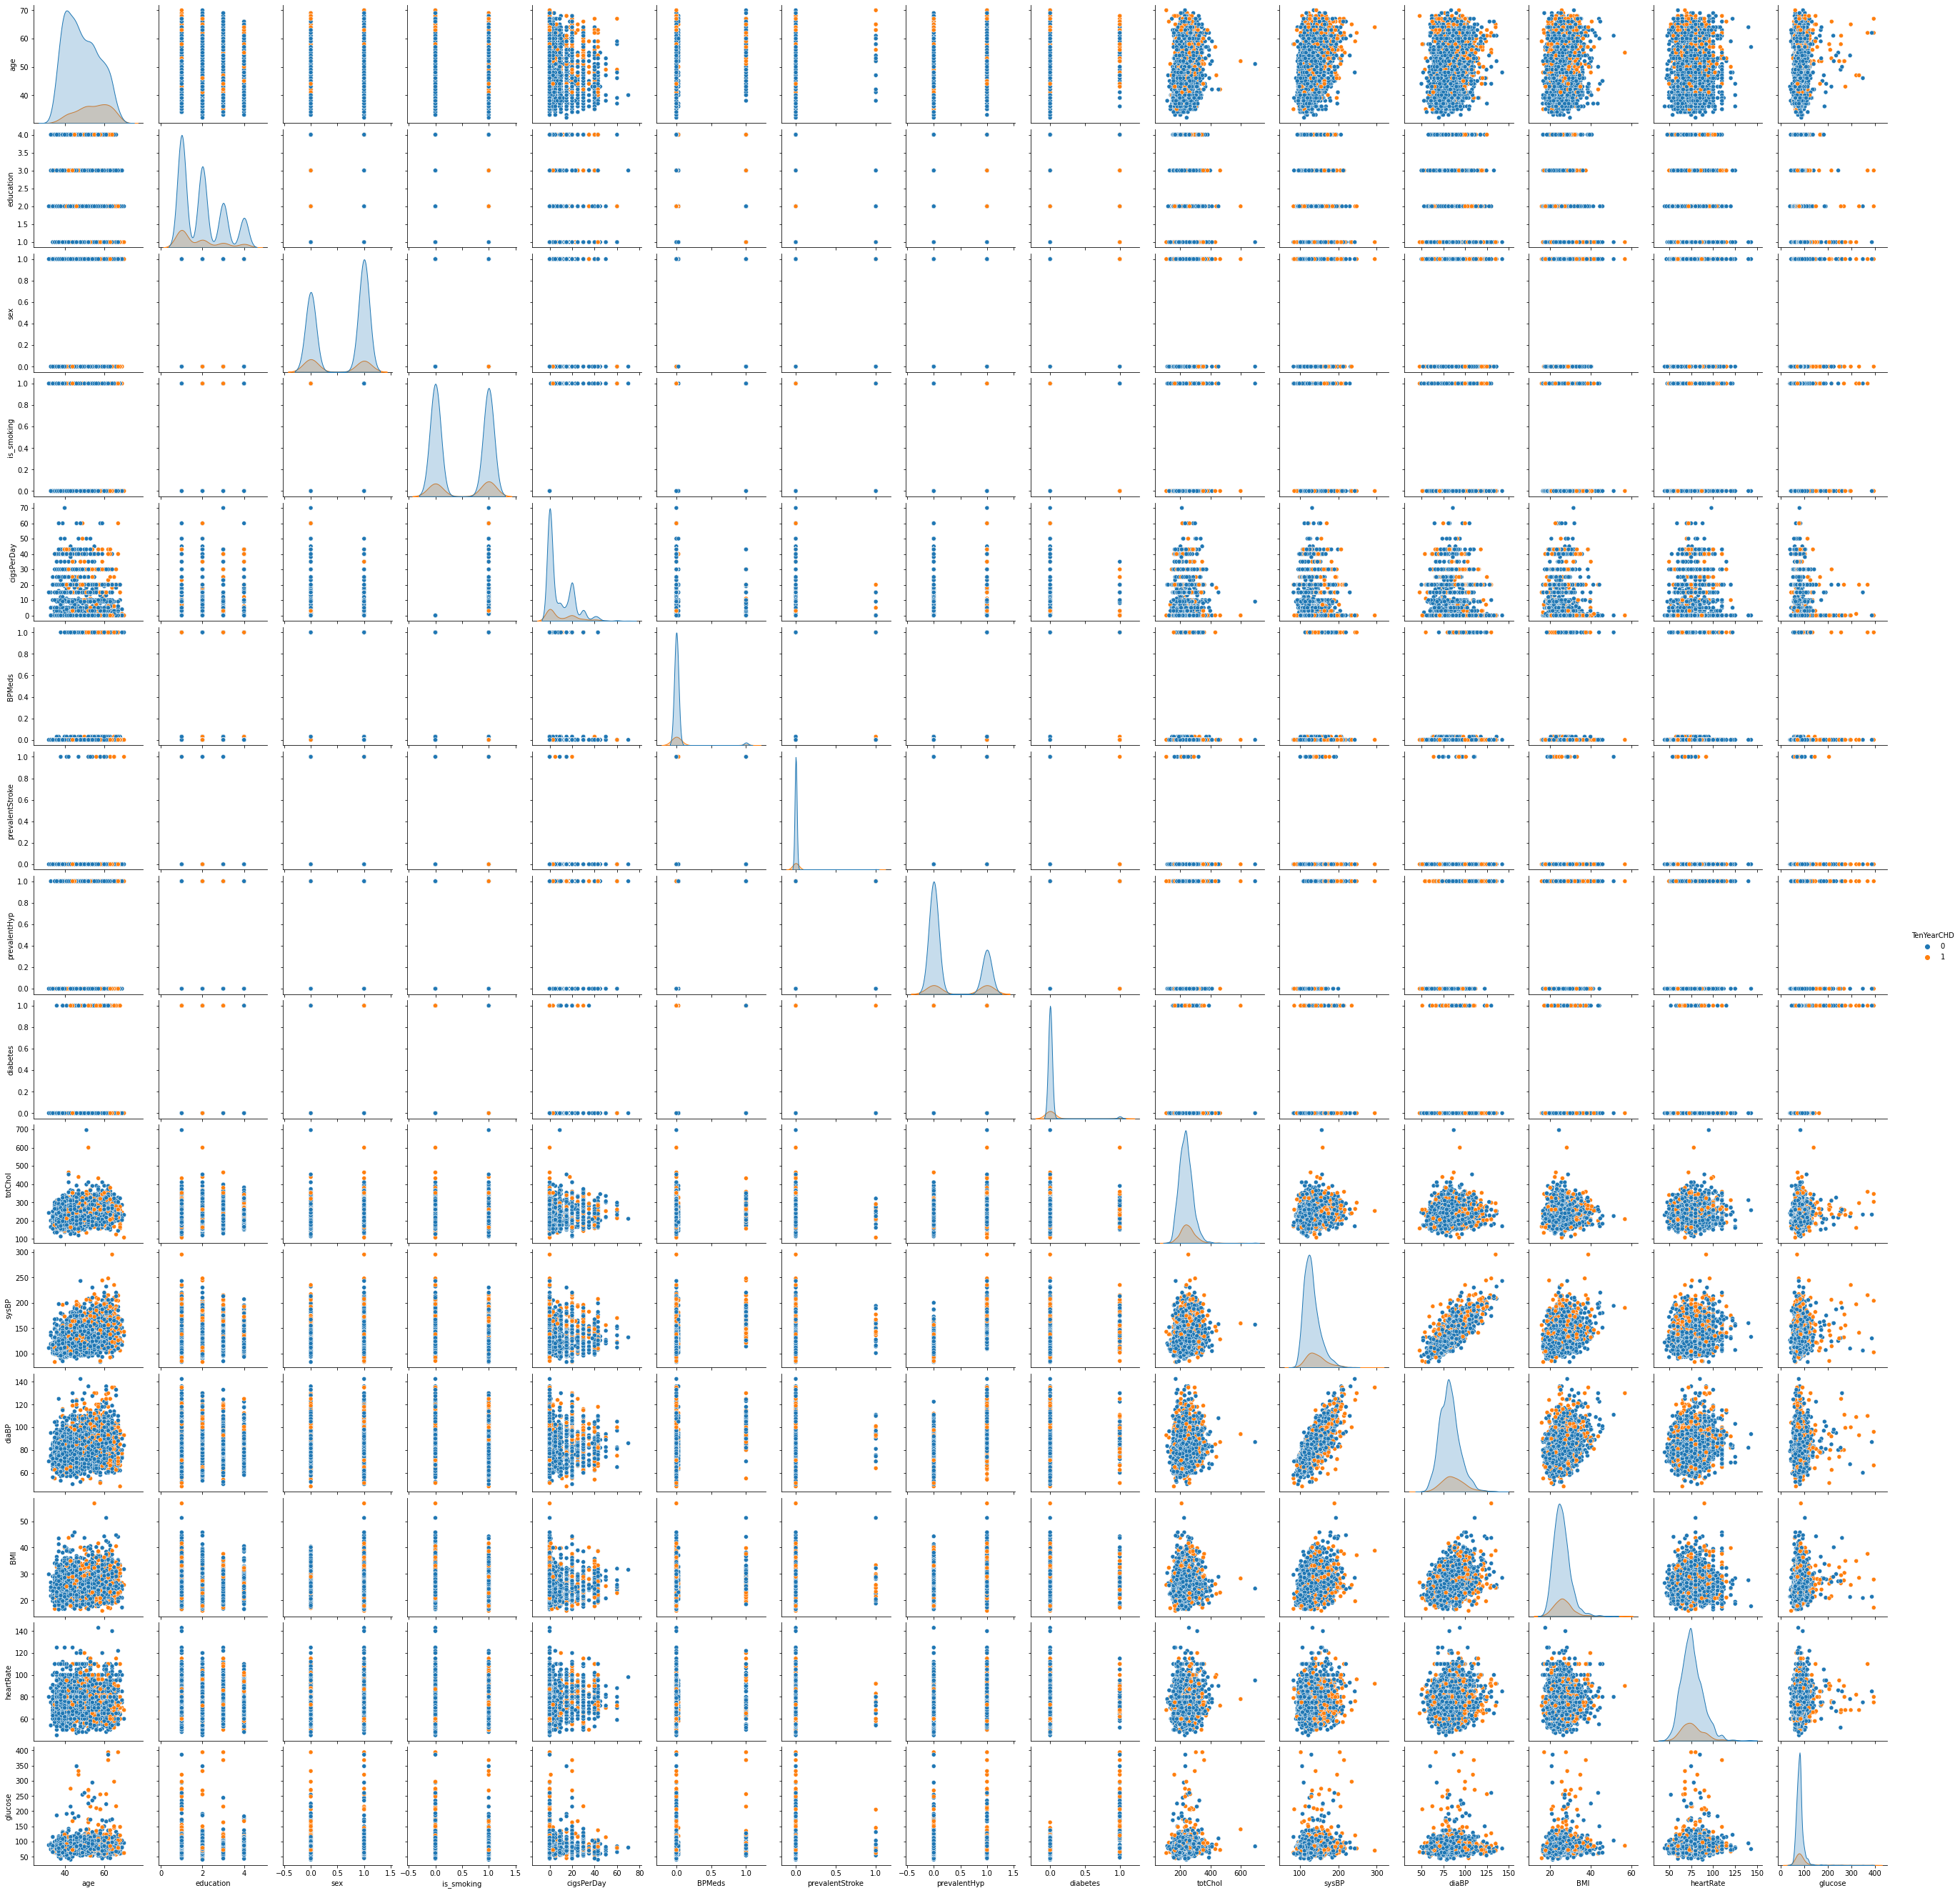

In [12]:
sns.pairplot(raw_df,hue='TenYearCHD')

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

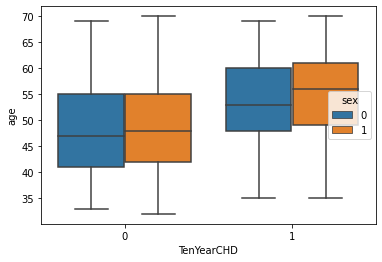

In [13]:
sns.boxplot(x="TenYearCHD",y='age',hue='sex',data=raw_df)

<AxesSubplot:>

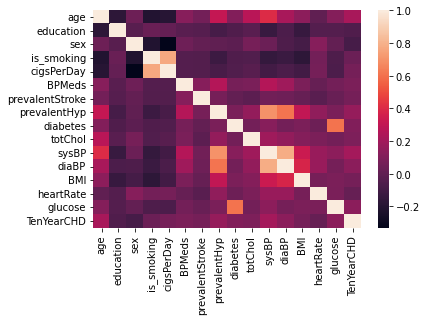

In [14]:
sns.heatmap(raw_df.corr())

Highly correlated :
- is_smoking & cigsPerDAY
- sysBP & diaBP
- sysBP & prevakentStroke

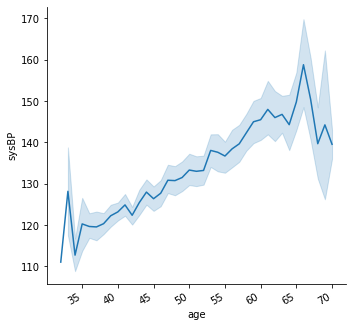

In [15]:
g = sns.relplot(x="age", y="sysBP", kind="line", data=raw_df)
g.figure.autofmt_xdate()

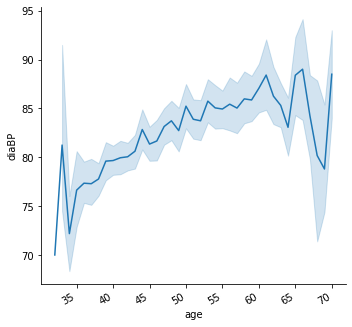

In [16]:
g = sns.relplot(x="age", y="diaBP", kind="line", data=raw_df)
g.figure.autofmt_xdate()

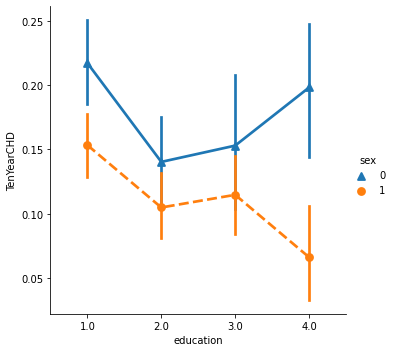

In [17]:
sns.catplot(x="education", y="TenYearCHD", hue="sex",
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=raw_df)

Normalisation

In [18]:
scaler = MinMaxScaler()
raw_df[['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]=scaler.fit_transform(raw_df[['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].values)

In [19]:
raw_df

age  education  sex  is_smoking  cigsPerDay    BPMeds  \
0     0.842105   0.333333    1           1    0.042857  0.000000   
1     0.105263   1.000000    0           0    0.000000  0.000000   
2     0.368421   0.000000    1           1    0.142857  0.000000   
3     0.473684   0.000000    0           1    0.285714  0.000000   
4     0.842105   0.000000    1           1    0.428571  0.000000   
...        ...        ...  ...         ...         ...       ...   
3385  0.736842   0.000000    1           0    0.000000  0.000000   
3386  0.368421   0.000000    1           0    0.000000  0.000000   
3387  0.315789   0.666667    0           1    0.042857  0.000000   
3388  0.736842   0.000000    0           0    0.000000  0.029886   
3389  0.578947   0.666667    1           0    0.000000  0.000000   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                   0             0         0  0.193548  0.304965  0.391534   
1                   0             1         0  0.178268  0.399527  0.529101   
2                   0             0         0  0.242784  0.153664  0.243386   
3                   0             1         0  0.213922  0.352246  0.423280   
4                   0             0         0  0.227504  0.250591  0.391534   
...               ...           ...       ...       ...       ...       ...   
3385                0             0         0  0.261460  0.189125  0.328042   
3386                0             0         0  0.156197  0.087470  0.084656   
3387                0             1         0  0.415959  0.380615  0.751323   
3388                0             1         0  0.142615  0.394799  0.603175   
3389                0             0         0  0.307301  0.191489  0.306878   

           BMI  heartRate   glucose  TenYearCHD  
0     0.240817   0.459184  0.112994           1  
1     0.338149   0.275510  0.098870           0  
2     0.107493   0.438776  0.152542           0  
3     0.301175   0.234694  0.152542           1  
4     0.256121   0.255102  0.104520           0  
...        ...        ...       ...         ...  
3385  0.326151   0.255102  0.177966           0  
3386  0.146915   0.357143  0.124294           0  
3387  0.317336   0.285714  0.090395           1  
3388  0.172625   0.357143  0.127119           0  
3389  0.340842   0.346939  0.146893           0  

[3390 rows x 16 columns]

In [20]:
raw_df.describe()

age    education          sex   is_smoking   cigsPerDay  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean      0.461636     0.315339     0.567257     0.497640     0.129564   
std       0.226128     0.339189     0.495529     0.500068     0.169149   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.263158     0.000000     0.000000     0.000000     0.000000   
50%       0.447368     0.333333     1.000000     0.000000     0.000000   
75%       0.631579     0.666667     1.000000     1.000000     0.285714   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3390.000000      3390.000000   3390.000000  3390.000000  3390.000000   
mean      0.029886         0.006490      0.315339     0.025664     0.220839   
std       0.169190         0.080309      0.464719     0.158153     0.076389   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       0.000000         0.000000      0.000000     0.000000     0.168081   
50%       0.000000         0.000000      0.000000     0.000000     0.217317   
75%       0.000000         0.000000      1.000000     0.000000     0.266553   
max       1.000000         1.000000      1.000000     1.000000     1.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean      0.232157     0.369133     0.240817     0.316092     0.118888   
std       0.105400     0.127234     0.100562     0.122144     0.065344   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.158392     0.280423     0.173115     0.234694     0.090395   
50%       0.212766     0.359788     0.231146     0.306122     0.112994   
75%       0.286052     0.444444     0.294748     0.387755     0.127119   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3390.000000  
mean      0.150737  
std       0.357846  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Export data

In [21]:
raw_df.to_pickle(EXPORT_PATH)